<a href="https://colab.research.google.com/github/endangrusiana123/SLO/blob/main/TugasBesarSLO_EfficientNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tugas Besar SLO
<center>

**Kelompok 7**

**"Deep-Learning-Based Diagnosis of Cassava Leaf Diseases Using CNN"**

| No.| Nama | NIM |
|:-----:|:-----:|:-----:|
| 1.  |Endang Rusiana| 201012320036 |
| 2. |Rachelina Putri Arta S|201012320020|
| 3. |Iqbal Kurniawan Perdana|201012320002|
| 4. |Rizky Araffathia|201012320003|

</center>

# Load Dataset

In [19]:
from google.colab import userdata
import os

os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')
os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')

!kaggle competitions download -c cassava-leaf-disease-classification
!unzip "cassava-leaf-disease-classification.zip"

KeyboardInterrupt: 

# Create Directories of Class

In [2]:
import os
import pandas as pd
import shutil
import matplotlib.pyplot as plt
from PIL import Image

# Path to the directory containing the train images
train_images_dir = 'train_images/'

# Path to the CSV file containing image_id and label information
csv_file = 'train.csv'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file)
print(df.shape)
df = df.head(2000)
print(df.shape)
print(df.label.value_counts())

import tensorflow as tf

# Load an image from a file
image_path = 'train_images/1000837476.jpg'
image = tf.io.read_file(image_path)
image = tf.image.decode_jpeg(image, channels=3)  # Decode JPEG image to tensor

# Print the shape of the image
print(f"Shape of the image: {image.shape}")

(21397, 2)
(2000, 2)
label
3    1235
4     242
2     219
1     215
0      89
Name: count, dtype: int64
Shape of the image: (600, 800, 3)


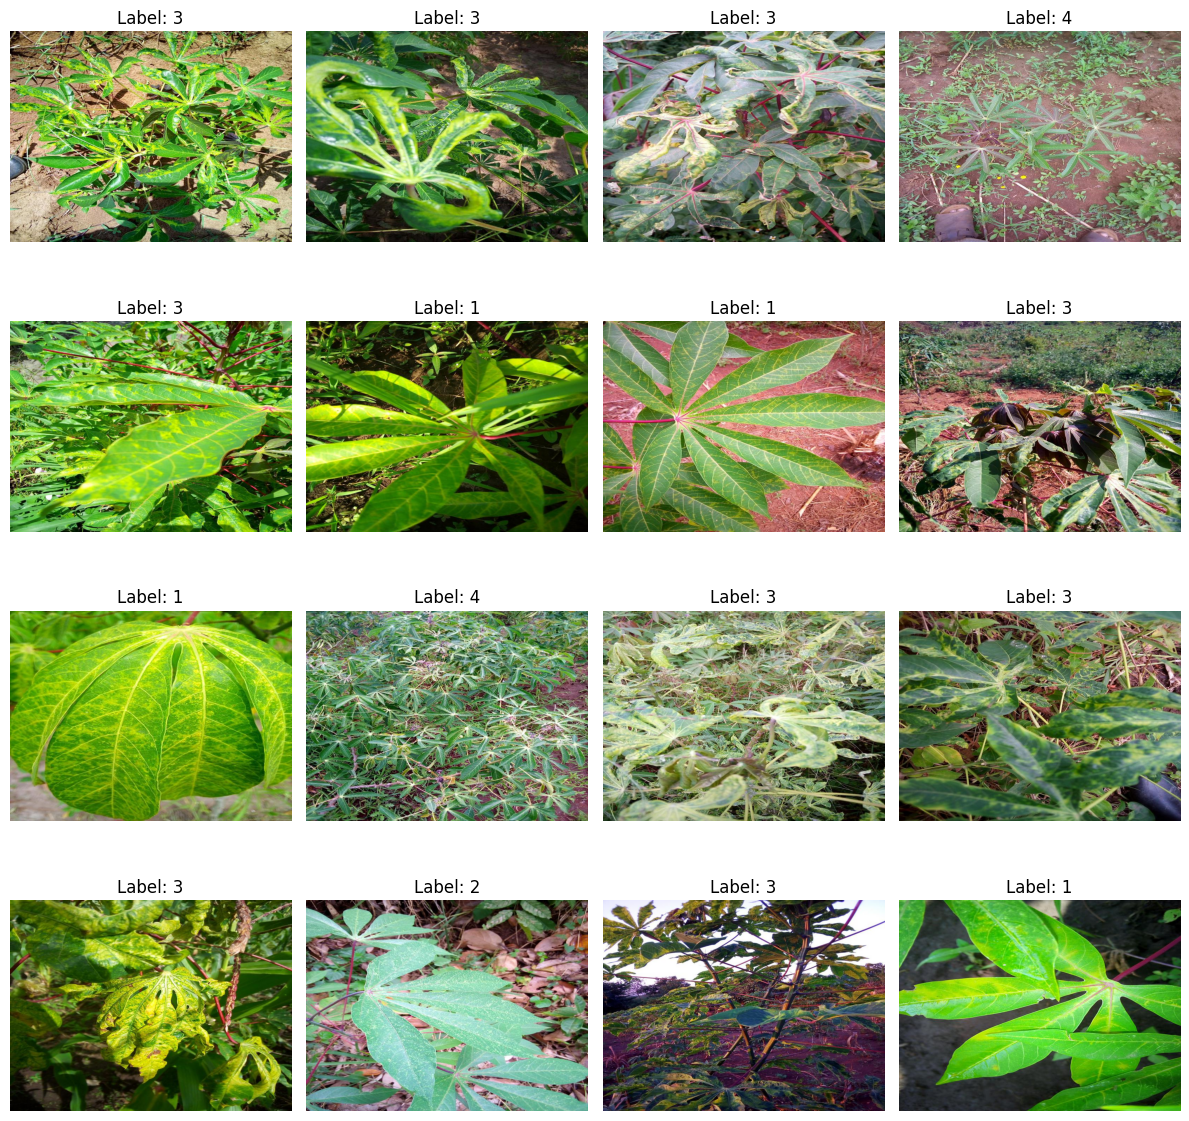

In [3]:
# Step 2: Preview sample images
sample_size = 16  # Number of sample images to preview
sample_images = df.sample(sample_size)

# Create subplots
fig, axes = plt.subplots(4, 4, figsize=(12, 12))

for ax, (_, row) in zip(axes.flatten(), sample_images.iterrows()):
    image_path = 'train_images/' + row['image_id']  # Assuming images are in train_images directory
    label = row['label']

    # Load and display image
    img = Image.open(image_path)
    ax.imshow(img)
    ax.set_title(f"Label: {label}")
    ax.axis('off')  # Turn off axis

plt.tight_layout()  # Adjust layout
plt.show()

In [4]:
# Iterate through each row in the DataFrame
for index, row in df.iterrows():
    image_id = row['image_id']
    label = row['label']

    # Create a directory for the class if it doesn't exist
    class_dir = os.path.join(train_images_dir, str(label))
    if not os.path.exists(class_dir):
        os.makedirs(class_dir)

    # Move the image to the class directory
    image_src = os.path.join(train_images_dir, image_id)
    image_dst = os.path.join(class_dir, image_id)
    shutil.move(image_src, image_dst)

In [5]:
train_dir = os.path.join('train_images')

In [6]:
os.listdir(train_dir)

['681073401.jpg',
 '2995689898.jpg',
 '2848438957.jpg',
 '2856404486.jpg',
 '3082742585.jpg',
 '1398249475.jpg',
 '1421925584.jpg',
 '815181959.jpg',
 '1529906734.jpg',
 '2807443000.jpg',
 '1870238448.jpg',
 '2087367640.jpg',
 '1521518831.jpg',
 '544498440.jpg',
 '599387864.jpg',
 '4052185416.jpg',
 '4213863678.jpg',
 '2953075261.jpg',
 '4108766138.jpg',
 '2999997152.jpg',
 '2190330048.jpg',
 '4102169055.jpg',
 '1438664994.jpg',
 '3983156415.jpg',
 '3913823345.jpg',
 '748448917.jpg',
 '1708792236.jpg',
 '484710612.jpg',
 '4091571824.jpg',
 '2321458.jpg',
 '3719137724.jpg',
 '1487877839.jpg',
 '2138403170.jpg',
 '2115515085.jpg',
 '1404738929.jpg',
 '2710925690.jpg',
 '722419138.jpg',
 '1983581913.jpg',
 '2474050099.jpg',
 '4171429454.jpg',
 '4176553783.jpg',
 '2617328550.jpg',
 '3131606113.jpg',
 '1641316249.jpg',
 '1681406227.jpg',
 '2536601960.jpg',
 '1417496054.jpg',
 '1813551465.jpg',
 '3582052804.jpg',
 '272311882.jpg',
 '3676057452.jpg',
 '1819398111.jpg',
 '3192966266.jpg',
 '51

In [7]:
# Load an image from a file
image_path = '/content/train_images/0/1000015157.jpg'
image = tf.io.read_file(image_path)
image = tf.image.decode_jpeg(image, channels=3)  # Decode JPEG image to tensor

# Print the shape of the image
print(f"Shape of the image: {image.shape}")

Shape of the image: (600, 800, 3)


In [57]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import matplotlib.pyplot as plt

# Define parameters
batch_size = 32
ori_size = 800
im_size = 512  # Image size (width and height)
crop_size = 512  # Crop size should be smaller than image size
image_size = (im_size, im_size)
target_size = (crop_size, crop_size)
train_images_dir = 'train_images/'  # Directory containing training images

hue_value = 0.2
saturation_value_lower = 1
saturation_value_upper = 1.2
brightness_value = 0.2
contrast_value_lower = 1.8
contrast_value_upper = 2

# Define a function to apply random crop and fixed transpose
def preprocess_image(image):
    image = tf.image.resize(image, [ori_size, ori_size])  # Resize to target size after center crop
    image = tf.image.random_crop(image, size=(crop_size, crop_size, 3))  # Random crop
    image = tf.transpose(image, perm=[1, 0, 2])  # Fixed transpose width and height
    image = tf.image.random_hue(image, hue_value)
    image = tf.image.random_saturation(image, saturation_value_lower, saturation_value_upper)
    image = tf.image.random_brightness(image, brightness_value)
    image = tf.image.random_contrast(image, contrast_value_lower, contrast_value_upper)
    return image

# Define a function to apply center crop for validation data
def center_crop_and_resize(image):
    image = tf.image.resize(image, [ori_size, ori_size])  # Resize to target size after center crop
    image = tf.image.central_crop(image, central_fraction=crop_size/ori_size)
    image = tf.transpose(image, perm=[1, 0, 2])  # Fixed transpose width and height
    image = tf.image.random_hue(image, hue_value)
    image = tf.image.random_saturation(image, saturation_value_lower, saturation_value_upper)
    image = tf.image.random_brightness(image, brightness_value)
    image = tf.image.random_contrast(image, contrast_value_lower, contrast_value_upper)
    return image

# Data Augmentation for training data
train_datagen = ImageDataGenerator(
    rotation_range=20,         # Rotate images by up to 20 degrees
    fill_mode='nearest',
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.2,      # 20% of the data will be used for validation
    preprocessing_function=preprocess_image,  # Apply the custom preprocessing function
    rescale=1./255
)

# Data Augmentation for validation data (only rescale and center crop, no other augmentation)
validation_datagen = ImageDataGenerator(
    validation_split=0.2,  # 20% of the data will be used for validation
    preprocessing_function=center_crop_and_resize,  # Apply the center crop function
    rescale=1./255
)

# Load and augment training data
train_generator = train_datagen.flow_from_directory(
    train_images_dir,
    target_size=target_size,  # Ensure target size matches crop size
    batch_size=batch_size,
    class_mode='categorical',  # Use 'sparse' for sparse categorical crossentropy
    subset='training',  # Set as training data
    shuffle=True  # Shuffle training data
)

# Load and augment validation data
validation_generator = validation_datagen.flow_from_directory(
    train_images_dir,
    target_size=target_size,  # Ensure target size matches crop size
    batch_size=batch_size,
    class_mode='categorical',  # Use 'sparse' for sparse categorical crossentropy
    subset='validation',  # Set as validation data
    shuffle=False  # No need to shuffle validation data
)

# Display some sample data
for i in range(5):
    img, label = train_generator.next()
    print(f"Batch {i+1}:")
    print(f"Images shape: {img.shape}")
    print(f"Labels: {label}")

# Now you can use these generators for model training


Found 1602 images belonging to 5 classes.
Found 398 images belonging to 5 classes.
Batch 1:
Images shape: (32, 512, 512, 3)
Labels: [[0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]]
Batch 2:
Images shape: (32, 512, 512, 3)
Labels: [[0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 

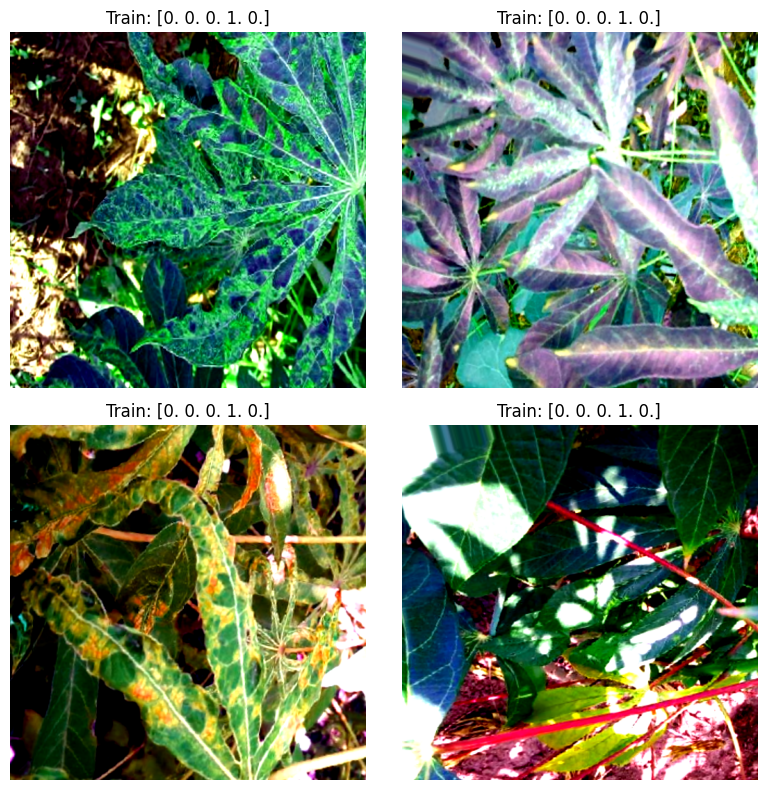

In [58]:
import numpy as np

# Display some sample data
fig, axes = plt.subplots(2, 2, figsize=(8, 8))

for i in range(2):
    for j in range(2):
        img, label = next(train_generator)
        ax = axes[i, j]
        ax.imshow(img[0])  # Display the first image in each batch
        ax.set_title(f"Train: {label[0]}")
        ax.axis('off')  # Turn off axis

plt.tight_layout()  # Adjust layout
plt.show()


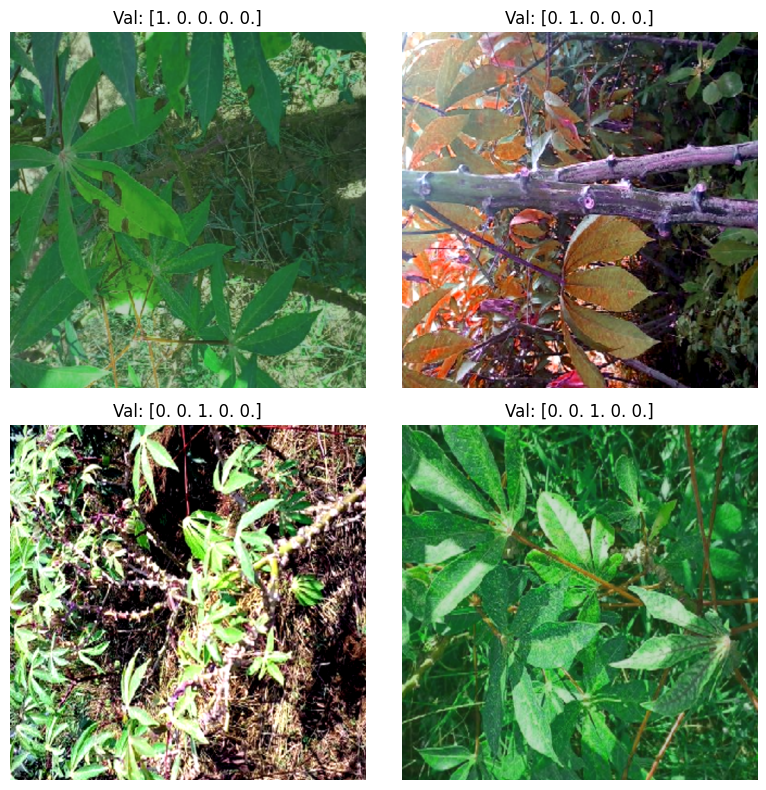

In [47]:
import numpy as np

# Display some sample data
fig, axes = plt.subplots(2, 2, figsize=(8, 8))

for i in range(2):
    for j in range(2):
        img, label = next(validation_generator)
        ax = axes[i, j]
        ax.imshow(img[0])  # Display the first image in each batch
        ax.set_title(f"Val: {label[0]}")
        ax.axis('off')  # Turn off axis

plt.tight_layout()  # Adjust layout
plt.show()

# EfficientNet

In [62]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB4
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Calculate steps per epoch for training and validation
#train_steps_per_epoch = train_size // batch_size
#validation_steps_per_epoch = validation_size // batch_size

# Define parameters
input_shape = (crop_size, crop_size, 3)
num_classes = 5
epochs = 10

# Load pre-trained VGG16 model without top layers
base_model = EfficientNetB4(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False
'''
# Add custom classification layers on top of VGG16
x = layers.Flatten()(base_model.output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.5)(x)
output = layers.Dense(num_classes, activation='sigmoid')(x)'''
'''
# Create the model
#model = models.Model(inputs=base_model.input, outputs=output)
output = layers.Dense(num_classes)(x)  # No activation here

# Apply log softmax activation
output = layers.Lambda(lambda x: tf.nn.softmax(x))(output)

# Create the model
model = models.Model(inputs=base_model.input, outputs=output)'''


# Add custom classification head
x = layers.GlobalAveragePooling2D()(base_model.output)
#x = layers.Dense(1024, activation='relu')(x)
#output = layers.Dense(num_classes, activation='softmax')(x)  # Assuming num_classes is the number of classes in your dataset
output = layers.Dense(num_classes,activation='sigmoid')(x)

# Create new model
model = models.Model(inputs=base_model.input, outputs=output)

# Define the desired learning rate
learning_rate = 0.001

# Create the Adam optimizer with the specified learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

'''
loss_fn = tf.keras.losses.CategoricalCrossentropy(from_logits = True)

model.compile(optimizer=optimizer,
              loss=loss_fn,
              metrics=['accuracy'])'''
# Compile the model with the custom optimizer
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Compile the model
'''model.compile(optimizer=optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])'''
'''model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])'''

# Print model summary
model.summary()
# Set up checkpoints to save the best model
checkpoint = ModelCheckpoint("efficientnetb4_best_model.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    train_generator,
    #steps_per_epoch=train_steps_per_epoch,
    epochs=epochs,
    validation_data=validation_generator,
    #validation_steps=validation_steps_per_epoch
    callbacks=[checkpoint, early_stopping]
)
'''history = model.fit(
      train_generator,
      epochs=epochs,
      validation_data=validation_generator,
      validation_steps=5)'''

Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_9 (InputLayer)        [(None, 512, 512, 3)]        0         []                            
                                                                                                  
 rescaling_16 (Rescaling)    (None, 512, 512, 3)          0         ['input_9[0][0]']             
                                                                                                  
 normalization_8 (Normaliza  (None, 512, 512, 3)          7         ['rescaling_16[0][0]']        
 tion)                                                                                            
                                                                                                  
 rescaling_17 (Rescaling)    (None, 512, 512, 3)          0         ['normalization_8[0][0]'

'history = model.fit(\n      train_generator,\n      epochs=epochs,\n      validation_data=validation_generator,\n      validation_steps=5)'

In [63]:
# Get the best epoch based on validation accuracy
best_epoch = np.argmax(history.history['val_accuracy']) + 1
best_val_accuracy = max(history.history['val_accuracy'])

print("Best epoch based on validation accuracy:", best_epoch)
print("Best validation accuracy:", best_val_accuracy)


Best epoch based on validation accuracy: 1
Best validation accuracy: 0.6206030249595642


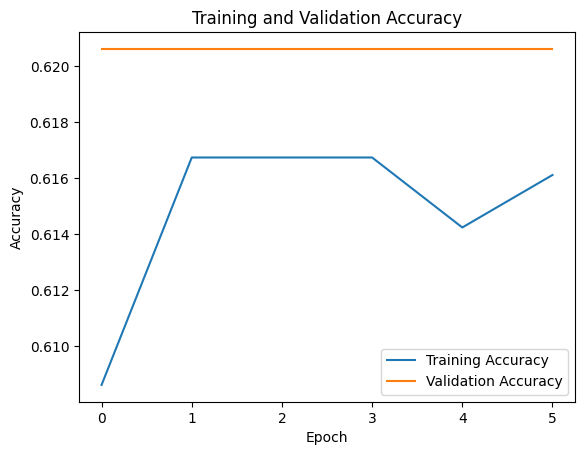

In [64]:

# Plot accuracy for each epoch
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

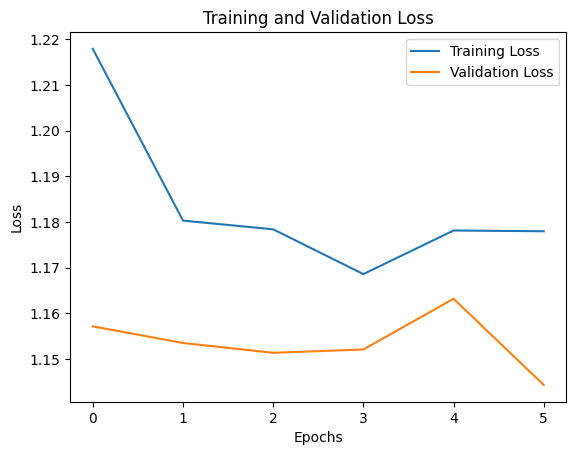

In [65]:

# Plotting the loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()